In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [5]:
df_train=pd.read_csv('C:/Users/TechVannah/Downloads/insurance.csv')
df_train

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#missing data
total=df_train.isnull().sum().sort_values(ascending=False)
percent= (df_train.isnull().sum()/df_train.isnull().count().sort_values(ascending=False))
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [15]:
#descriptive statistic summary
df_train['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

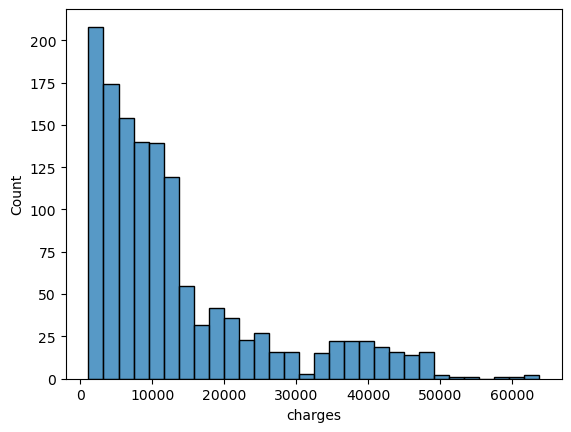

In [16]:
#histogram
sns.histplot(df_train['charges']);

In [14]:
#Skewness and kurtosis
print ("Skewness: %f" % df_train['charges'].skew())
print ("Kurtosis: %f" % df_train['charges'].kurt())

Skewness: 1.515880
Kurtosis: 1.606299


<AxesSubplot:xlabel='age', ylabel='charges'>

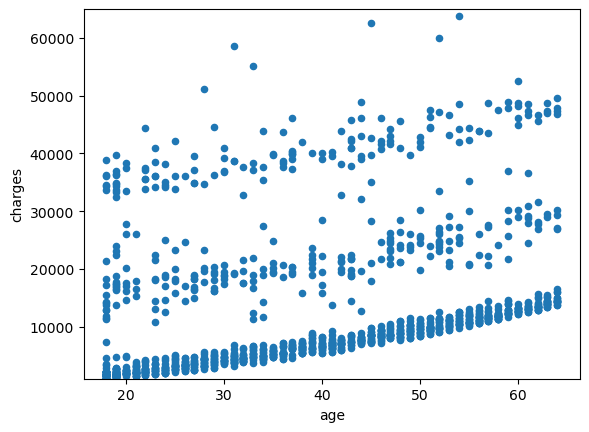

In [31]:
#bivariate analysis charges/age
var='age'
data=pd.concat([df_train['charges'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='charges', ylim=(1000,65000))

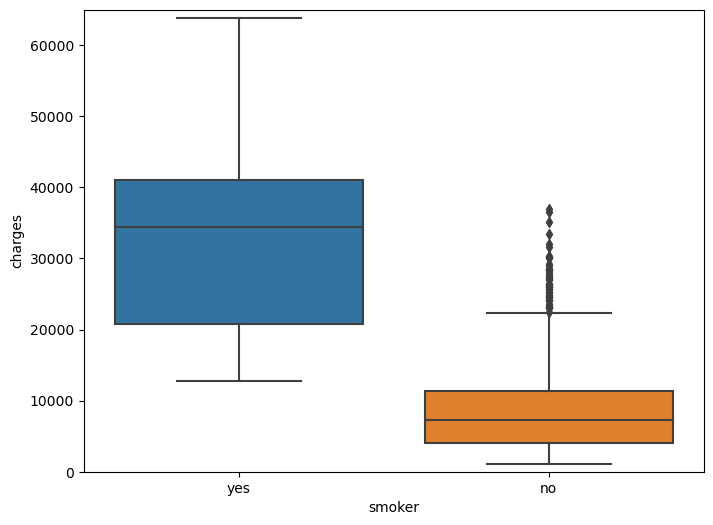

In [44]:
#boxplot smoker/charges
var='smoker'
data= pd.concat([df_train['charges'], df_train[var]], axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='charges', data=data)
fig.axis(ymin=0, ymax=65000);

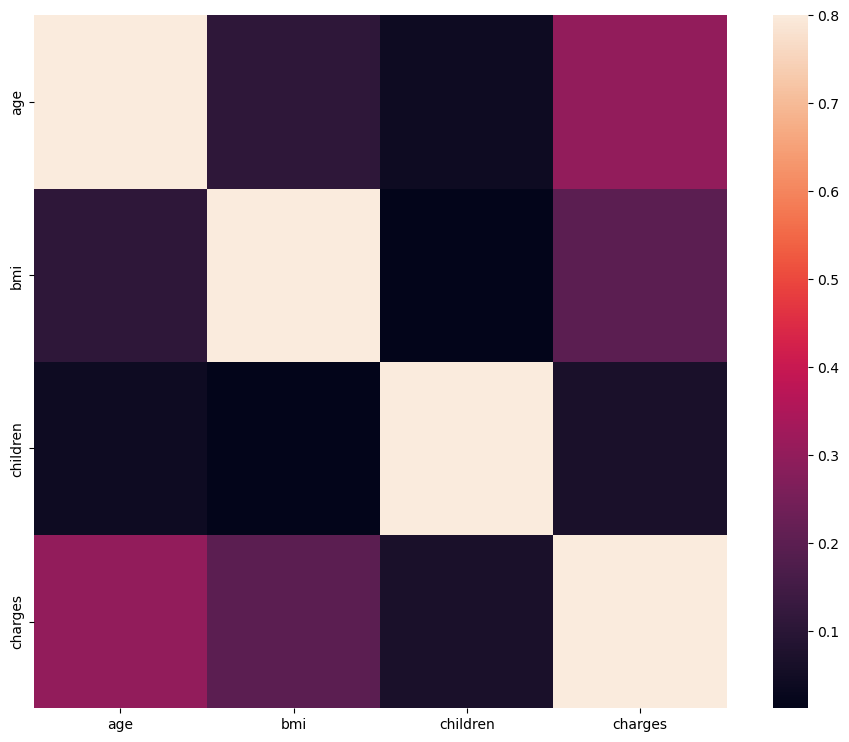

In [45]:
#correlation matrix
corrmat=df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

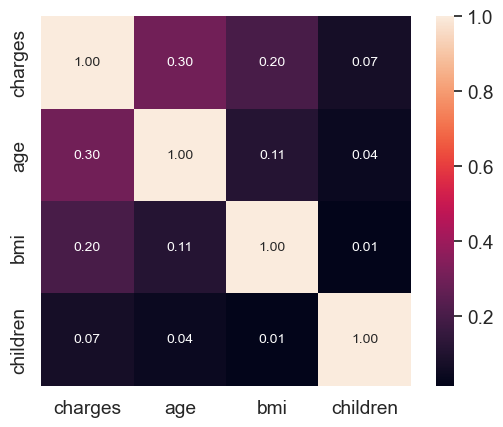

In [73]:
#charges correlation matrix
k= 4 #number of variables for heatmap
cols=corrmat.nlargest(k, 'charges')['charges'].index
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,xticklabels=cols.values);
plt.show()

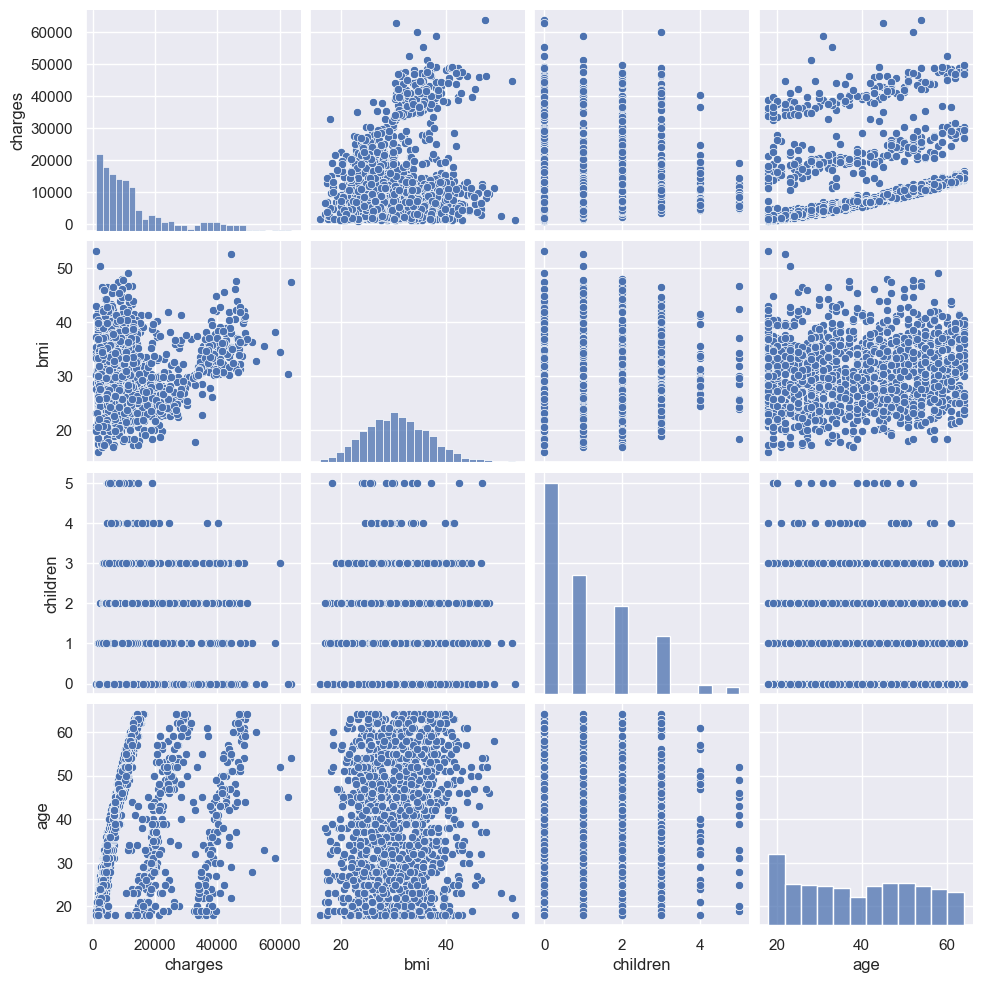

In [71]:
#scatterplolt
sns.set()
cols = ['charges', 'bmi', 'children', 'age']
sns.pairplot(df_train[cols])
plt.show();